In [32]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os 

# Lets move dir to where the data is stored

In [33]:
path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Epanet_python/validation_data" # mac
# path = r"C:\Users\frodi\Documents\OptimisedHeating\Epanet_python\validation_data" # windows

os.chdir(path)

print(os.listdir())

['rs_sim_flow.csv', 'RS_flow_sim.csv', 'VE_nedri_actual_power.csv', 'flow_values_VE_nedri.csv', 'VE_efri_actual_energy.csv', 'RS_energy_sim.csv', 'rjupnasalir_two_pumps_actual.csv', 'VE_pumps_sim.csv', 'flow_values_VE_efri.csv', 'VE_nedri_flow_sim.csv', 'rs_actual_flow.csv', 'rs_sim_energy.csv', 'flow_VE_efri_sim.csv', 'VE_nedri_pumps_energy_sim.csv']


# Lets load data

In [34]:
VE_efri_flow = pd.read_csv("flow_values_VE_efri.csv")
VE_efri_flow = VE_efri_flow.copy()

VE_efri_flow["start_time"] = pd.to_datetime(VE_efri_flow["start_time"])
day = VE_efri_flow["start_time"].dt.date

VE_efri_flow = VE_efri_flow.drop(columns=["start_time"])
VE_efri_flow = VE_efri_flow.rename(columns={"value" : "VE_efri_actual_flow"})

VE_efri_flow = VE_efri_flow[:22]


print(VE_efri_flow)

    VE_efri_actual_flow
0                 13.09
1                 13.21
2                 13.33
3                 13.66
4                 13.82
5                 14.26
6                 14.72
7                 15.43
8                 14.92
9                 14.85
10                15.35
11                15.30
12                15.02
13                15.04
14                15.13
15                15.70
16                16.04
17                15.00
18                15.68
19                16.06
20                15.73
21                15.42


In [35]:
day = day[0]

In [36]:
VE_efri_power = pd.read_csv("VE_efri_actual_energy.csv")
VE_efri_power = VE_efri_power.drop(columns=["start_time","mpoint_id"])
VE_efri_power = VE_efri_power.rename(columns={"value" : "VE_efri_actual_power"})

VE_efri_power = VE_efri_power[:22]

print(VE_efri_power)


    VE_efri_actual_power
0               8.906800
1               8.738703
2               8.819042
3               8.937070
4               9.151142
5               9.376118
6               9.826668
7              10.602832
8              10.714926
9              10.535128
10             10.584887
11             10.834787
12             10.757351
13             10.483632
14             10.488431
15             10.571823
16             10.955705
17             11.242806
18             10.970045
19             11.450062
20             11.700407
21             11.534070


In [37]:
VE_efri_flow_sim = pd.read_csv("flow_VE_efri_sim.csv")
VE_efri_flow_sim = VE_efri_flow_sim.drop(columns = ["Time (hrs)"])
VE_efri_flow_sim = VE_efri_flow_sim.rename(columns={"Flow Pipe-62614 (LPS)" : "VE_efri_simulated_flow"})

print(VE_efri_flow_sim)


    VE_efri_simulated_flow
0                16.460409
1                16.753527
2                17.044498
3                17.834209
4                18.211933
5                19.234739
6                20.281548
7                21.857033
8                20.729822
9                20.573521
10               21.681271
11               21.571423
12               20.952719
13               20.997181
14               21.196775
15               22.446632
16               23.180248
17               20.907288
18               22.403151
19               23.223085
20               22.511772
21               21.835026


In [38]:
VE_efri_power_sim = pd.read_csv("VE_pumps_sim.csv")
VE_efri_power_sim = VE_efri_power_sim.drop(columns = ["Time (hrs)", "Vatnsendi efra 2 (kW)"])
VE_efri_power_sim = VE_efri_power_sim.rename(columns={"Vatnsendi efra 1 (kW)": "VE_efri_simulated_power"})

print(VE_efri_power_sim)


    VE_efri_simulated_power
0                  8.018060
1                  8.159202
2                  8.299225
3                  8.678807
4                  8.860128
5                  9.350310
6                  9.850731
7                 10.601321
8                 10.064618
9                  9.990069
10                10.517743
11                10.465487
12                10.170876
13                10.192064
14                10.287149
15                10.881383
16                11.229192
17                10.149224
18                10.860744
19                11.249477
20                10.912296
21                10.590858


In [39]:
VE_efri_df = pd.concat([VE_efri_flow,VE_efri_power,VE_efri_flow_sim,VE_efri_power_sim], axis=1)
VE_efri_df.head()

,VE_efri_actual_flow,VE_efri_actual_power,VE_efri_simulated_flow,VE_efri_simulated_power
0,13.09,8.906800,16.460409,8.018060
1,13.21,8.738703,16.753527,8.159202
2,13.33,8.819042,17.044498,8.299225
3,13.66,8.937070,17.834209,8.678807
4,13.82,9.151142,18.211933,8.860128


In [40]:
VE_efri_df["VE_efri_simulated_flow"] = VE_efri_df["VE_efri_simulated_flow"] * 0.75
# VE_nedri_df["VE_nedri_simulated_power"] = VE_nedri_df["VE_nedri_simulated_power"] * (1/8)


VE_efri_df.head()

,VE_efri_actual_flow,VE_efri_actual_power,VE_efri_simulated_flow,VE_efri_simulated_power
0,13.09,8.906800,12.345307,8.018060
1,13.21,8.738703,12.565145,8.159202
2,13.33,8.819042,12.783374,8.299225
3,13.66,8.937070,13.375657,8.678807
4,13.82,9.151142,13.658950,8.860128


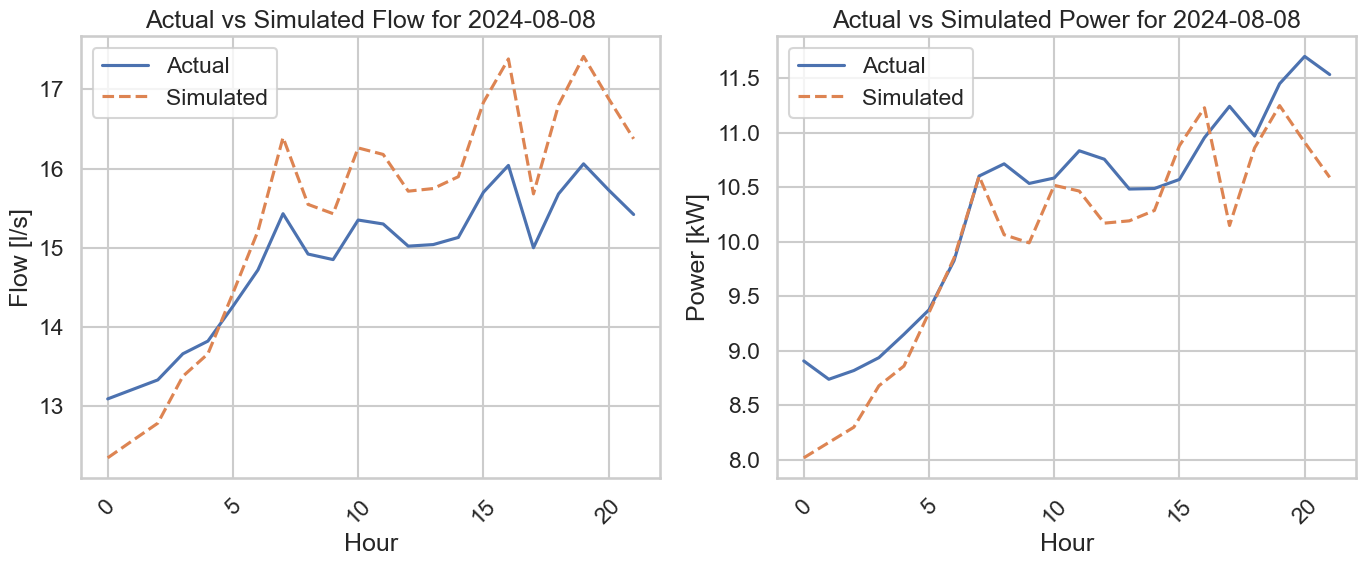

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for clean plots
sns.set(style="whitegrid", context="talk")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Actual vs Simulated Flow
sns.lineplot(ax=axes[0], x=VE_efri_df.index, y="VE_efri_actual_flow", data=VE_efri_df, label="Actual")
sns.lineplot(ax=axes[0], x=VE_efri_df.index, y="VE_efri_simulated_flow", data=VE_efri_df, label="Simulated", linestyle='--')
axes[0].set_title(f"Actual vs Simulated Flow for {day}")
axes[0].set_xlabel("Hour")
axes[0].set_ylabel("Flow [l/s]")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Actual vs Simulated Power
sns.lineplot(ax=axes[1], x=VE_efri_df.index, y="VE_efri_actual_power", data=VE_efri_df, label="Actual")
sns.lineplot(ax=axes[1], x=VE_efri_df.index, y="VE_efri_simulated_power", data=VE_efri_df, label="Simulated", linestyle='--')
axes[1].set_title(f"Actual vs Simulated Power for {day}")
axes[1].set_xlabel("Hour")
axes[1].set_ylabel("Power [kW]")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show
plt.tight_layout()
plt.show()


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from scipy.stats import pearsonr

# For Flow
actual_flow = VE_efri_df["VE_efri_actual_flow"]
sim_flow = VE_efri_df["VE_efri_simulated_flow"]

mae_flow = mean_absolute_error(actual_flow, sim_flow)
rmse_flow = np.sqrt(mean_squared_error(actual_flow, sim_flow))
r_flow, p_flow = pearsonr(actual_flow, sim_flow)

print(f"Flow MAE: {mae_flow:.3f}")
print(f"Flow RMSE: {rmse_flow:.3f}")
print(f"Flow Pearson r: {r_flow:.3f} (p = {p_flow:.3g})")

# For Power
actual_power = VE_efri_df["VE_efri_actual_power"]
sim_power = VE_efri_df["VE_efri_simulated_power"]

mae_power = mean_absolute_error(actual_power, sim_power)
rmse_power = np.sqrt(mean_squared_error(actual_power, sim_power))
r_power, p_power = pearsonr(actual_power, sim_power)

print(f"Power MAE: {mae_power:.3f}")
print(f"Power RMSE: {rmse_power:.3f}")
print(f"Power Pearson r: {r_power:.3f} (p = {p_power:.3g})")


Flow MAE: 0.769
Flow RMSE: 0.836
Flow Pearson r: 1.000 (p = 1.88e-36)
Power MAE: 0.410
Power RMSE: 0.514
Power Pearson r: 0.923 (p = 9.46e-10)


MAE = 0.769
On average, the simulated flow values differ from the actual flow by about 0.77 units (likely liters per second). This is your typical absolute error.
RMSE = 0.836
The root mean squared error is slightly higher than MAE, meaning there are some errors that are a bit larger (since RMSE penalizes larger errors more).
Pearson r = 1.000 (p = 1.88e-36)
This indicates an almost perfect linear correlation between actual and simulated flows. The p-value is essentially zero, confirming this strong correlation is statistically significant.
Interpretation: Your flow simulation is very accurate, with errors less than 1 L/s on average and almost perfect correlation with actual data.

Power:
MAE = 0.410
On average, the simulated power deviates from actual power by about 0.41 kW.
RMSE = 0.514
Slightly higher than MAE, showing there are some points with larger deviation, but still fairly close overall.
Pearson r = 0.923 (p = 9.46e-10)
This is a very strong positive linear correlation between simulated and actual power, also highly statistically significant.
Interpretation: Power simulation is quite good, with slightly larger errors relative to flow, but still strongly correlated with actual measurements.